## Population Lecture I



### Introduction



Today we&rsquo;ll introduce some key &ldquo;stylized facts&rdquo; about human
population and its growth.  None of these are &ldquo;causal&rdquo; statements,
just observations about relationships.

-   **Fact I:** Population growth is fundamentally exponential, but the
    rate of growth has fallen over time.
-   **Fact II:** Population growth rates are generally higher in places
    where people are poorer.
-   **Fact III:** Variation in growth rates across countries is
    accounted for more by variation in fertility than by mortality.



### Getting Data



#### The World Development Indicators & `wbdata`



The World Bank maintains a large set of &ldquo;World Development Indicators&rdquo; (WDI),
including information on population.  

-   API for WDI is available at [https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation)

-   A `python` module that uses the API is `wbdata`, written by Oliver Sherouse.

-   Available at [http://github.com/OliverSherouse/wbdata](http://github.com/OliverSherouse/wbdata).

-   Documented at [https://wbdata.readthedocs.io](https://wbdata.readthedocs.io).



#### Getting Population Data Using wbdata



##### Goals



We want to devise ways to visualize the following:

-   Global population growth from 1960 to the present;
-   Population growth rates versus GDP per capita;
-   Age-sex population pyramids.



##### Methods (using wbdata)



We walk through the process of getting data from the WDI into a
`pandas` DataFrame. 

The `wbdata` module has several key functions we&rsquo;ll want to use:

-   **`search_countries()`:** Returns code for different countries or
    regions.
-   **`get_source()`:** Gives list of different data sources that can
    be accessed using the module; returns a numeric key;
-   **`get_indicator()`:** Given a source, this returns a list of
    available variables (indicators).
-   **`get_dataframe()`:** Given a source and a list of indicators,
    this returns a dataframe populated with the requested data
    for whatever

Begin by importing the module:



In [54]:
## If import fails with "ModuleNotFoundError"
## uncomment below & try again
# !pip install wbdata
!pip install wbdata
import wbdata
import numpy as np

###### `wbdata.search_countries()`



What countries and regions are available?  Looking up the country
  codes, or searching for particular strings:



In [55]:
import wbdata

# Return list of all country/region codes:
wbdata.get_country()

# Return list matching a query term:
#wbdata.search_countries("World")

## Try your own search!
# wbdata.search_countries("")

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

###### `wbdata.get_source()`



To see possible datasets we can access via the API, use `get_source()`



In [56]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

###### `wbdata.get_indicator()`



&ldquo;Population estimates and projections&rdquo; looks promising.
 See what indicators/variables are available?



In [57]:
SOURCE = 40 # "Population estimates and projections

# call the indicators (dependent variables) 
indicators = wbdata.get_indicator(source=SOURCE)

##### Getting Population Over Time



Let&rsquo;s get data on the global population and see how it has changed over
 time. The variable `SP.POP.TOTL` seems like a reasonable place to
 start.  

We want to get a `pandas.DataFrame` of total population:



### Plotting Data



##### Plotting data from pandas.DataFrame



Let&rsquo;s make a time-series plot of global population.  We&rsquo;ll use the
 `plot.ly` `cufflinks` module, which integrates with `pandas`.  Here&rsquo;s two lines to set up the plotting environment:



In [58]:
!pip install cufflinks # IF NECESSARY
import cufflinks as cf
cf.go_offline()

##### Plotting Global Population Over time



With that done, after we have a DataFrame making a plot is just one
 line of code:



In [59]:
import pandas as pd

In [60]:
import numpy as np

In [61]:
wbdata.get_indicator(source=SOURCE)

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

In [62]:
indicators = {"NY.GDP.PCAP.CD":"GDP per capita", 
              "SH.DYN.1019": "Death Probability (5-9)",
              "SH.DYN.2024": 'Death Probability (20-24)',
              "SP.DYN.TFRT.IN":"Total Fertility Rate",
              "SP.POP.GROW":"Population Growth Rate",
              "SP.DYN.AMRT.MA":"Male Mortality",
              "SP.DYN.AMRT.FE":"Female Mortality",
              "SP.POP.1564.FE.ZS":"% Adult Female",
              "SP.POP.TOTL.FE.ZS":"% Female", 
              "SM.POP.NETM": "Net Migration", 
              "SP.POP.TOTL": "Total Population"}

data = wbdata.get_dataframe(indicators)

# Make years ints instead of strings
data.reset_index(inplace=True)
data['date'] = data['date'].astype(int)

# index the table by country instead of year 
data.set_index(['country'],inplace=True)
data

date  GDP per capita  Death Probability (5-9)  \
country                                                                      
Africa Eastern and Southern  2022     1644.062829                      NaN   
Africa Eastern and Southern  2021     1545.613215                15.237635   
Africa Eastern and Southern  2020     1355.805923                15.549840   
Africa Eastern and Southern  2019     1507.982881                15.878293   
Africa Eastern and Southern  2018     1558.307482                16.214853   
...                           ...             ...                      ...   
Zimbabwe                     1964      282.376856                      NaN   
Zimbabwe                     1963      277.532515                      NaN   
Zimbabwe                     1962      275.966139                      NaN   
Zimbabwe                     1961      279.332656                      NaN   
Zimbabwe                     1960      276.643363                      NaN   

                             Death Probability (20-24)  Total Fertility Rate  \
country                                                                        
Africa Eastern and Southern                        NaN                   NaN   
Africa Eastern and Southern                  13.303625              4.354709   
Africa Eastern and Southern                  13.464270              4.416900   
Africa Eastern and Southern                  13.663853              4.482898   
Africa Eastern and Southern                  13.879416              4.527705   
...                                                ...                   ...   
Zimbabwe                                           NaN              7.261000   
Zimbabwe                                           NaN              7.253000   
Zimbabwe                                           NaN              7.255000   
Zimbabwe                                           NaN              7.233000   
Zimbabwe                                           NaN              7.220000   

                             Population Growth Rate  Male Mortality  \
country                                                               
Africa Eastern and Southern                2.543757             NaN   
Africa Eastern and Southern                2.607472      332.823489   
Africa Eastern and Southern                2.678184      311.485254   
Africa Eastern and Southern                2.691134      302.772370   
Africa Eastern and Southern                2.688371      309.165595   
...                                             ...             ...   
Zimbabwe                                   3.119878      358.796000   
Zimbabwe                                   3.115408      361.354000   
Zimbabwe                                   3.105320      366.062000   
Zimbabwe                                   3.094865      369.918000   
Zimbabwe                                        NaN      374.000000   

                             Female Mortality  % Adult Female   % Female  \
country                                                                    
Africa Eastern and Southern               NaN       56.014300  50.472347   
Africa Eastern and Southern        237.602676       55.774440  50.478916   
Africa Eastern and Southern        224.232001       55.549322  50.486544   
Africa Eastern and Southern        218.643251       55.348700  50.495993   
Africa Eastern and Southern        224.119316       55.174578  50.504887   
...                                       ...             ...        ...   
Zimbabwe                           289.764000       48.293704  50.592112   
Zimbabwe                           292.298000       48.477738  50.571874   
Zimbabwe                           295.259000       48.906566  50.550845   
Zimbabwe                           298.708000       49.274670  50.528305   
Zimbabwe                           298.765000       49.607951  50.503874   

                             Net Migration  Total Population

In [63]:
# cleaning up data 

In [64]:


mig_away = data[data['Net Migration'] < 0]

In [65]:
mig_away['Net Migration'] = mig_away['Net Migration'].abs()

In [66]:
mig_away['Migration per Capita'] = mig_away['Net Migration']/mig_away['Total Population']

In [67]:
mig_away['Migration Rate (%)'] = mig_away['Migration per Capita']*100

In [68]:
#mig_new = mig_away['

In [70]:
# select only values with Lebanon
mig_lebanon = mig_away.loc['Lebanon']

# clean up the NaN. 
# NOTE: this command only drops the value that cannot be represented, but it keeps the index, which is why your shit doesn't get fucked up
#  and you can still plot things accurately 
mig_lebanon = mig_lebanon.replace([np.inf, -np.inf], np.nan).dropna(subset=['GDP per capita', 'Death Probability (5-9)',
       'Death Probability (20-24)', 'Total Fertility Rate',
       'Population Growth Rate', 'Male Mortality', 'Female Mortality'])

mig_lebanon

date  GDP per capita  Death Probability (5-9)  \
country                                                  
Lebanon  2021     4136.146575                      3.4   
Lebanon  2020     5599.957523                      3.4   
Lebanon  2019     8925.421860                      3.5   
Lebanon  2018     9225.845155                      3.5   
Lebanon  2017     8679.897422                      3.7   
Lebanon  2016     8172.299476                      3.6   
Lebanon  2015     7802.751368                      3.7   
Lebanon  2010     7695.245415                      4.1   
Lebanon  2009     7149.791498                      4.2   
Lebanon  2002     4307.100827                      5.4   
Lebanon  2001     4021.177263                      5.6   
Lebanon  1994     2468.819841                      6.9   
Lebanon  1993     2079.646174                      7.1   
Lebanon  1992     1560.198708                      7.3   
Lebanon  1990      789.850392                     17.6   

         Death Probability (20-24)  Total Fertility Rate  \
country                                                    
Lebanon                        3.0                 2.091   
Lebanon                        3.0                 2.103   
Lebanon                        3.0                 2.130   
Lebanon                        3.0                 2.148   
Lebanon                        3.5                 2.173   
Lebanon                        3.1                 2.183   
Lebanon                        3.1                 2.178   
Lebanon                        3.3                 2.126   
Lebanon                        3.4                 2.085   
Lebanon                        3.9                 2.410   
Lebanon                        4.0                 2.462   
Lebanon                        4.5                 2.868   
Lebanon                        4.6                 2.970   
Lebanon                        4.7                 3.081   
Lebanon                       34.7                 3.295   

         Population Growth Rate  Male Mortality  Female Mortality  \
country                                                             
Lebanon               -1.249035         125.642            82.505   
Lebanon               -2.079337          89.717            60.448   
Lebanon               -2.879866          77.491            54.273   
Lebanon               -2.627213          72.251            51.429   
Lebanon               -2.415521          76.060            51.346   
Lebanon               -2.217280          75.598            52.480   
Lebanon                1.966373          77.379            54.409   
Lebanon                0.898072          86.271            60.573   
Lebanon                1.291280          89.171            61.863   
Lebanon                1.300762         119.483            79.993   
Lebanon                1.574298         124.073            89.363   
Lebanon                1.799673         155.906           117.896   
Lebanon                1.940490         160.296           120.119   
Lebanon                2.122894         158.626           123.694   
Lebanon                1.915947         410.451           140.675   

         % Adult Female   % Female  Net Migration  Total Population  \
country                                                               
Lebanon       63.458296  51.480958       115122.0         5592631.0   
Lebanon       63.596051  51.468809       115146.0         5662923.0   
Lebanon       64.041323  51.328792       237572.0         5781907.0   
Lebanon       64.818247  51.071320       233520.0         5950839.0   
Lebanon       65.710334  50.831149       230947.0         6109252.0   
Lebanon       66.685710  50.608049       228173.0         6258619.0   
Lebanon       67.712542  50.402504       223722.0         6398940.0   
Lebanon       67.758887  50.400897        40915.0         4995800.0   
Lebanon       67.467420  50.416985         2700.0         4951135.0   
Lebanon       64.182777  50.484723        2154

In [71]:
# print stats for lebanon out of curiosity 
migstats_lebanon = mig_lebanon['Migration Rate (%)'].describe()
print(migstats_lebanon)

count    15.000000
mean      1.660015
std       1.692461
min       0.024925
25%       0.130401
50%       0.818988
75%       3.570988
max       4.108887
Name: Migration Rate (%), dtype: float64


In [72]:
# now index for year 

mig_lebanon.set_index(['date'],inplace=False)
mig_lebanon

date  GDP per capita  Death Probability (5-9)  \
country                                                  
Lebanon  2021     4136.146575                      3.4   
Lebanon  2020     5599.957523                      3.4   
Lebanon  2019     8925.421860                      3.5   
Lebanon  2018     9225.845155                      3.5   
Lebanon  2017     8679.897422                      3.7   
Lebanon  2016     8172.299476                      3.6   
Lebanon  2015     7802.751368                      3.7   
Lebanon  2010     7695.245415                      4.1   
Lebanon  2009     7149.791498                      4.2   
Lebanon  2002     4307.100827                      5.4   
Lebanon  2001     4021.177263                      5.6   
Lebanon  1994     2468.819841                      6.9   
Lebanon  1993     2079.646174                      7.1   
Lebanon  1992     1560.198708                      7.3   
Lebanon  1990      789.850392                     17.6   

         Death Probability (20-24)  Total Fertility Rate  \
country                                                    
Lebanon                        3.0                 2.091   
Lebanon                        3.0                 2.103   
Lebanon                        3.0                 2.130   
Lebanon                        3.0                 2.148   
Lebanon                        3.5                 2.173   
Lebanon                        3.1                 2.183   
Lebanon                        3.1                 2.178   
Lebanon                        3.3                 2.126   
Lebanon                        3.4                 2.085   
Lebanon                        3.9                 2.410   
Lebanon                        4.0                 2.462   
Lebanon                        4.5                 2.868   
Lebanon                        4.6                 2.970   
Lebanon                        4.7                 3.081   
Lebanon                       34.7                 3.295   

         Population Growth Rate  Male Mortality  Female Mortality  \
country                                                             
Lebanon               -1.249035         125.642            82.505   
Lebanon               -2.079337          89.717            60.448   
Lebanon               -2.879866          77.491            54.273   
Lebanon               -2.627213          72.251            51.429   
Lebanon               -2.415521          76.060            51.346   
Lebanon               -2.217280          75.598            52.480   
Lebanon                1.966373          77.379            54.409   
Lebanon                0.898072          86.271            60.573   
Lebanon                1.291280          89.171            61.863   
Lebanon                1.300762         119.483            79.993   
Lebanon                1.574298         124.073            89.363   
Lebanon                1.799673         155.906           117.896   
Lebanon                1.940490         160.296           120.119   
Lebanon                2.122894         158.626           123.694   
Lebanon                1.915947         410.451           140.675   

         % Adult Female   % Female  Net Migration  Total Population  \
country                                                               
Lebanon       63.458296  51.480958       115122.0         5592631.0   
Lebanon       63.596051  51.468809       115146.0         5662923.0   
Lebanon       64.041323  51.328792       237572.0         5781907.0   
Lebanon       64.818247  51.071320       233520.0         5950839.0   
Lebanon       65.710334  50.831149       230947.0         6109252.0   
Lebanon       66.685710  50.608049       228173.0         6258619.0   
Lebanon       67.712542  50.402504       223722.0         6398940.0   
Lebanon       67.758887  50.400897        40915.0         4995800.0   
Lebanon       67.467420  50.416985         2700.0         4951135.0   
Lebanon       64.182777  50.484723        2154

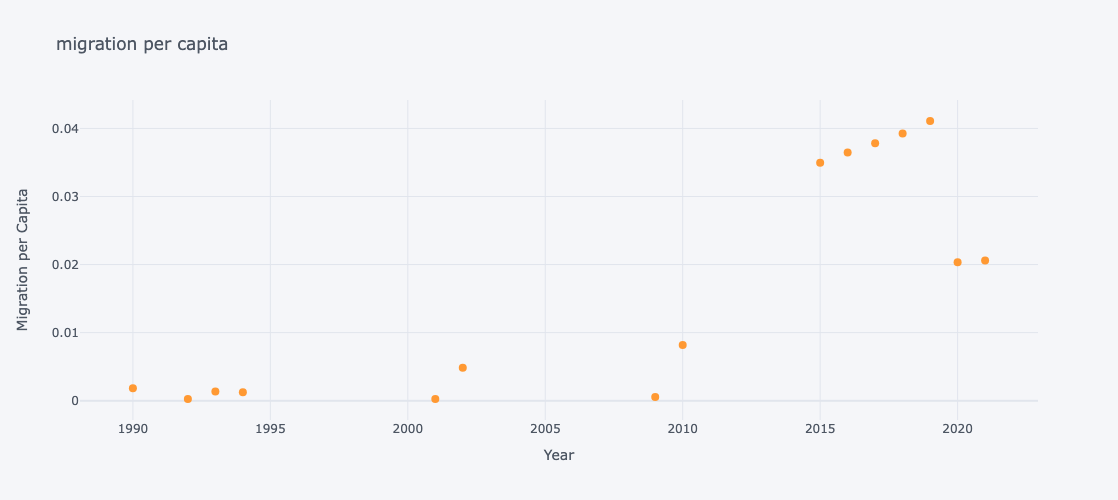

In [73]:
# plot the migration per capita 

mig_lebanon.iplot(kind='scatter', mode = 'markers', size = 8,
         x = 'date', y="Migration per Capita",
         text=mig_lebanon.reset_index('country')['date'].values.tolist(),
         xTitle="Year",yTitle="Migration per Capita",
         title="migration per capita", dimensions=(800, 500))

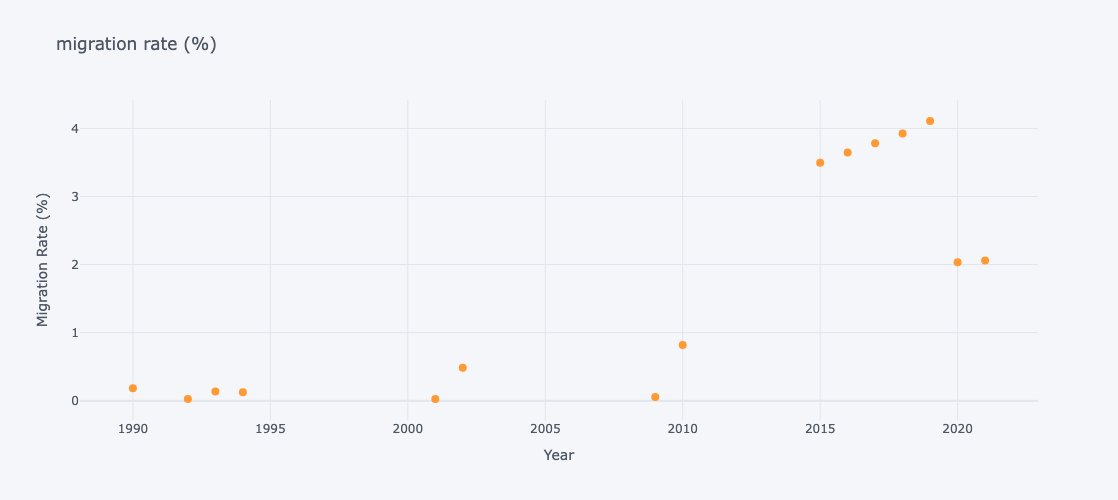

In [74]:
# plot migration Rate over time – (it will be the same graph) 
mig_lebanon.iplot(kind='scatter', mode = 'markers', size = 8,
         x = 'date', y="Migration Rate (%)",
         text=mig_lebanon.reset_index('country')['date'].values.tolist(),
         xTitle="Year",yTitle="Migration Rate (%)",
         title="migration rate (%)", dimensions=(800, 500))

### So, now that we've been able to do this, let's isolate countries with the highest migration rate per capita so that we can have more data points. 

In [75]:
# grab the old table back 

mig_away

date  GDP per capita  Death Probability (5-9)  \
country                                                                      
Africa Eastern and Southern  2021     1545.613215                15.237635   
Africa Eastern and Southern  2020     1355.805923                15.549840   
Africa Eastern and Southern  2019     1507.982881                15.878293   
Africa Eastern and Southern  2018     1558.307482                16.214853   
Africa Eastern and Southern  2017     1625.286236                16.545213   
...                           ...             ...                      ...   
Zimbabwe                     1964      282.376856                      NaN   
Zimbabwe                     1963      277.532515                      NaN   
Zimbabwe                     1962      275.966139                      NaN   
Zimbabwe                     1961      279.332656                      NaN   
Zimbabwe                     1960      276.643363                      NaN   

                             Death Probability (20-24)  Total Fertility Rate  \
country                                                                        
Africa Eastern and Southern                  13.303625              4.354709   
Africa Eastern and Southern                  13.464270              4.416900   
Africa Eastern and Southern                  13.663853              4.482898   
Africa Eastern and Southern                  13.879416              4.527705   
Africa Eastern and Southern                  14.129777              4.570409   
...                                                ...                   ...   
Zimbabwe                                           NaN              7.261000   
Zimbabwe                                           NaN              7.253000   
Zimbabwe                                           NaN              7.255000   
Zimbabwe                                           NaN              7.233000   
Zimbabwe                                           NaN              7.220000   

                             Population Growth Rate  Male Mortality  \
country                                                               
Africa Eastern and Southern                2.607472      332.823489   
Africa Eastern and Southern                2.678184      311.485254   
Africa Eastern and Southern                2.691134      302.772370   
Africa Eastern and Southern                2.688371      309.165595   
Africa Eastern and Southern                2.655672      314.493882   
...                                             ...             ...   
Zimbabwe                                   3.119878      358.796000   
Zimbabwe                                   3.115408      361.354000   
Zimbabwe                                   3.105320      366.062000   
Zimbabwe                                   3.094865      369.918000   
Zimbabwe                                        NaN      374.000000   

                             Female Mortality  % Adult Female   % Female  \
country                                                                    
Africa Eastern and Southern        237.602676       55.774440  50.478916   
Africa Eastern and Southern        224.232001       55.549322  50.486544   
Africa Eastern and Southern        218.643251       55.348700  50.495993   
Africa Eastern and Southern        224.119316       55.174578  50.504887   
Africa Eastern and Southern        231.688216       55.018897  50.515859   
...                                       ...             ...        ...   
Zimbabwe                           289.764000       48.293704  50.592112   
Zimbabwe                           292.298000       48.477738  50.571874   
Zimbabwe                           295.259000       48.906566  50.550845   
Zimbabwe                           298.708000       49.274670  50.528305   
Zimbabwe                           298.765000       49.607951  50.503874   

                             Net Migration  Total Population

In [76]:
# to find the most highest rates of migration, first we could look at just that column, using the describe function: 

migration_stats = mig_away['Migration Rate (%)'].describe()
print('Migration Stats Overall') 
print(migration_stats)
print('Migration Stats Lebanon')
print(migstats_lebanon)

Migration Stats Overall
count    9554.000000
mean        0.528162
std         1.223437
min         0.000052
25%         0.074353
50%         0.232396
75%         0.611789
max        71.408673
Name: Migration Rate (%), dtype: float64
Migration Stats Lebanon
count    15.000000
mean      1.660015
std       1.692461
min       0.024925
25%       0.130401
50%       0.818988
75%       3.570988
max       4.108887
Name: Migration Rate (%), dtype: float64


In [77]:
# Assuming mig_away is a DataFrame
data3 = np.array(mig_away.index)

# Convert the index array to a DataFrame
df_index = pd.DataFrame(data3, columns=['Index'])


# Drop duplicates from the DataFrame
unique_df_index = df_index.drop_duplicates()

print(unique_df_index)

# all countries in a list! 
country_array = unique_df_index['Index'].to_numpy()
print(country_array) 

                               Index
0        Africa Eastern and Southern
42        Africa Western and Central
100                       Arab World
137           Caribbean small states
197   Central Europe and the Baltics
...                              ...
9341           Virgin Islands (U.S.)
9377              West Bank and Gaza
9429                     Yemen, Rep.
9491                          Zambia
9532                        Zimbabwe

[248 rows x 1 columns]
['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'IBRD only' 'IDA & 

In [78]:
mig_away.columns

Index(['date', 'GDP per capita', 'Death Probability (5-9)',
       'Death Probability (20-24)', 'Total Fertility Rate',
       'Population Growth Rate', 'Male Mortality', 'Female Mortality',
       '% Adult Female', '% Female', 'Net Migration', 'Total Population',
       'Migration per Capita', 'Migration Rate (%)'],
      dtype='object')

In [79]:
mig_small = mig_away[['GDP per capita', 'Total Fertility Rate', 'Migration Rate (%)']]
mig_small

GDP per capita  Total Fertility Rate  \
country                                                             
Africa Eastern and Southern     1545.613215              4.354709   
Africa Eastern and Southern     1355.805923              4.416900   
Africa Eastern and Southern     1507.982881              4.482898   
Africa Eastern and Southern     1558.307482              4.527705   
Africa Eastern and Southern     1625.286236              4.570409   
...                                     ...                   ...   
Zimbabwe                         282.376856              7.261000   
Zimbabwe                         277.532515              7.253000   
Zimbabwe                         275.966139              7.255000   
Zimbabwe                         279.332656              7.233000   
Zimbabwe                         276.643363              7.220000   

                             Migration Rate (%)  
country                                          
Africa Eastern and Southern            0.025526  
Africa Eastern and Southern            0.007146  
Africa Eastern and Southern            0.028087  
Africa Eastern and Southern            0.056345  
Africa Eastern and Southern            0.054220  
...                                         ...  
Zimbabwe                               0.233485  
Zimbabwe                               0.224250  
Zimbabwe                               0.220531  
Zimbabwe                               0.218597  
Zimbabwe                               0.216903  

[9581 rows x 3 columns]

In [82]:
unique_country_indices = mig_small.index.unique()

In [83]:
def compute_average_for_country(dataframe):
    unique_country_indices = dataframe.index.unique()

    if not unique_country_indices.empty:
        # Create an empty DataFrame with columns
        results = pd.DataFrame(columns=['GDP per capita', 'Total Fertility Rate', 'Migration Rate (%)'])

        for country_index in unique_country_indices:
            country_data = dataframe.loc[country_index]
            GDPcap_avg = country_data['GDP per capita'].mean()
            fert_avg = country_data['Total Fertility Rate'].mean()
            mig_avg = country_data['Migration Rate (%)'].mean()

            # Append the computed averages to the results DataFrame
            results.loc[country_index] = [GDPcap_avg, fert_avg, mig_avg]

        return results

In [84]:
averages = compute_average_for_country(mig_small)
averages

GDP per capita  Total Fertility Rate  \
Africa Eastern and Southern         926.178010              5.657691   
Africa Western and Central          854.557659              6.224940   
Arab World                         2874.281582              5.339708   
Caribbean small states             4269.499674              3.253752   
Central Europe and the Baltics     9195.891040              1.807741   
...                                        ...                   ...   
Virgin Islands (U.S.)             37230.561391              2.485139   
West Bank and Gaza                 2430.902122              4.567600   
Yemen, Rep.                         919.065754              7.034435   
Zambia                              422.391540              6.919878   
Zimbabwe                            725.276261              5.198367   

                                Migration Rate (%)  
Africa Eastern and Southern               0.077050  
Africa Western and Central                0.064624  
Arab World                                0.111025  
Caribbean small states                    0.835481  
Central Europe and the Baltics            0.100204  
...                                            ...  
Virgin Islands (U.S.)                     0.893542  
West Bank and Gaza                        0.624048  
Yemen, Rep.                               0.249057  
Zambia                                    0.388728  
Zimbabwe                                  0.657040  

[248 rows x 3 columns]

In [85]:
averages.sort_values(by='Migration Rate (%)', inplace=True)
averages

GDP per capita  Total Fertility Rate  \
Netherlands                   1114.088472              3.170000   
Brazil                        4639.497306              3.345405   
Korea, Dem. People's Rep.             NaN              1.935464   
Denmark                               NaN              2.560000   
Germany                      10146.082013              1.400000   
...                                   ...                   ...   
Equatorial Guinea              285.114334              5.801455   
South Sudan                   1158.463538              5.478000   
Northern Mariana Islands     17787.313936                   NaN   
Qatar                        59587.200900              1.808500   
Kuwait                       23930.056373              2.552286   

                           Migration Rate (%)  
Netherlands                          0.010046  
Brazil                               0.011259  
Korea, Dem. People's Rep.            0.011982  
Denmark                              0.012263  
Germany                              0.014165  
...                                       ...  
Equatorial Guinea                    2.871493  
South Sudan                          2.947294  
Northern Mariana Islands             3.381873  
Qatar                                3.543467  
Kuwait                              12.560581  

[248 rows x 3 columns]

In [86]:
migration_stats = averages['Migration Rate (%)'].describe()
print(migration_stats) 

count    248.000000
mean       0.617813
std        0.992610
min        0.010046
25%        0.129468
50%        0.336133
75%        0.805067
max       12.560581
Name: Migration Rate (%), dtype: float64


In [87]:
# going off of the 75th percentile from the averages, extract highest 25% 

mig_high = averages[averages['Migration Rate (%)'] >= 0.8]
mig_high

GDP per capita  Total Fertility Rate  \
Gibraltar                               NaN              2.398119   
Pacific island small states     2042.903179              4.569111   
Fiji                            2271.021599              3.690000   
Caribbean small states          4269.499674              3.253752   
Sao Tome and Principe           1197.940105              5.617082   
...                                     ...                   ...   
Equatorial Guinea                285.114334              5.801455   
South Sudan                     1158.463538              5.478000   
Northern Mariana Islands       17787.313936                   NaN   
Qatar                          59587.200900              1.808500   
Kuwait                         23930.056373              2.552286   

                             Migration Rate (%)  
Gibraltar                              0.803207  
Pacific island small states            0.810645  
Fiji                                   0.819631  
Caribbean small states                 0.835481  
Sao Tome and Principe                  0.840539  
...                                         ...  
Equatorial Guinea                      2.871493  
South Sudan                            2.947294  
Northern Mariana Islands               3.381873  
Qatar                                  3.543467  
Kuwait                                12.560581  

[63 rows x 3 columns]

In [88]:
mig_high.reset_index(inplace = True) 

mig_high

# Drop duplicates from the DataFrame
#country_high_array = np.array(countries_high_df.index)
#country_high_array

index  GDP per capita  Total Fertility Rate  \
0                     Gibraltar             NaN              2.398119   
1   Pacific island small states     2042.903179              4.569111   
2                          Fiji     2271.021599              3.690000   
3        Caribbean small states     4269.499674              3.253752   
4         Sao Tome and Principe     1197.940105              5.617082   
..                          ...             ...                   ...   
58            Equatorial Guinea      285.114334              5.801455   
59                  South Sudan     1158.463538              5.478000   
60     Northern Mariana Islands    17787.313936                   NaN   
61                        Qatar    59587.200900              1.808500   
62                       Kuwait    23930.056373              2.552286   

    Migration Rate (%)  
0             0.803207  
1             0.810645  
2             0.819631  
3             0.835481  
4             0.840539  
..                 ...  
58            2.871493  
59            2.947294  
60            3.381873  
61            3.543467  
62           12.560581  

[63 rows x 4 columns]

In [89]:
countries_high_df_LONG = pd.DataFrame(columns = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'], index = mig_high['index'])

countries_high_df_LONG

1960 1961 1962 1963 1964 1965 1966 1967 1968 1969  \
index                                                                           
Gibraltar                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Pacific island small states  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Fiji                         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Caribbean small states       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Sao Tome and Principe        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Equatorial Guinea            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
South Sudan                  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Northern Mariana Islands     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Qatar                        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Kuwait                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                             ... 2012 2013 2014 2015 2016 2017 2018 2019 2020  \
index                        ...                                                
Gibraltar                    ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Pacific island small states  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Fiji                         ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Caribbean small states       ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Sao Tome and Principe        ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Equatorial Guinea            ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
South Sudan                  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Northern Mariana Islands     ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Qatar                        ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Kuwait                       ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                            2021  
index                             
Gibraltar                    NaN  
Pacific island small states  NaN  
Fiji                         NaN  
Caribbean small states       NaN  
Sao Tome and Principe        NaN  
...                          ...  
Equatorial Guinea            NaN  
South Sudan                  NaN  
Northern Mariana Islands     NaN  
Qatar                        NaN  
Kuwait                       NaN  

[63 rows x 62 columns]

In [90]:


# have to find a way, at this point, to separate out and graph by those specific countries


In [91]:
#years = {'Year': [ = 

years = mig_away['date'].drop_duplicates()
years = years.astype(int)
np_years = years.to_numpy()

#np_years
years_sorted = years.sort_values(ascending=True)
years_array = years_sorted.to_numpy()

#years_sorted.astype(str)
years_str = years_array.astype(str)
years_str

#years_sorted['date']

# turn years_sorted into a string so that I can make them into columns 

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'], dtype='<U21')

In [92]:

#To perform linear regression using pandas, you can use the statsmodels library, which provides a comprehensive set of statistical models. Here's an example of how to perform linear regression using pandas and statsmodels:
import pandas as pd
import statsmodels.api as sm

In [93]:
def setup_long(dataframe):
    unique_country_indices = dataframe.index.unique()

    if not unique_country_indices.empty:
        # Create an empty DataFrame with columns
        results = pd.DataFrame(columns=['GDP per capita', 'Total Fertility Rate', 'Migration Rate (%)'])

        for country_index in unique_country_indices:
            country_data = dataframe.loc[country_index]
            GDPcap_avg = country_data['GDP per capita'].mean()
            fert_avg = country_data['Total Fertility Rate'].mean()
            mig_avg = country_data['Migration Rate (%)'].mean()

            # Append the computed averages to the results DataFrame
            results.loc[country_index] = [GDPcap_avg, fert_avg, mig_avg]

        return results

In [94]:
original_df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

original_df

A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

In [95]:
transposed_df = original_df.transpose()
transposed_df 


0  1  2
A  1  2  3
B  4  5  6
C  7  8  9

In [96]:
mig_away

date  GDP per capita  Death Probability (5-9)  \
country                                                                      
Africa Eastern and Southern  2021     1545.613215                15.237635   
Africa Eastern and Southern  2020     1355.805923                15.549840   
Africa Eastern and Southern  2019     1507.982881                15.878293   
Africa Eastern and Southern  2018     1558.307482                16.214853   
Africa Eastern and Southern  2017     1625.286236                16.545213   
...                           ...             ...                      ...   
Zimbabwe                     1964      282.376856                      NaN   
Zimbabwe                     1963      277.532515                      NaN   
Zimbabwe                     1962      275.966139                      NaN   
Zimbabwe                     1961      279.332656                      NaN   
Zimbabwe                     1960      276.643363                      NaN   

                             Death Probability (20-24)  Total Fertility Rate  \
country                                                                        
Africa Eastern and Southern                  13.303625              4.354709   
Africa Eastern and Southern                  13.464270              4.416900   
Africa Eastern and Southern                  13.663853              4.482898   
Africa Eastern and Southern                  13.879416              4.527705   
Africa Eastern and Southern                  14.129777              4.570409   
...                                                ...                   ...   
Zimbabwe                                           NaN              7.261000   
Zimbabwe                                           NaN              7.253000   
Zimbabwe                                           NaN              7.255000   
Zimbabwe                                           NaN              7.233000   
Zimbabwe                                           NaN              7.220000   

                             Population Growth Rate  Male Mortality  \
country                                                               
Africa Eastern and Southern                2.607472      332.823489   
Africa Eastern and Southern                2.678184      311.485254   
Africa Eastern and Southern                2.691134      302.772370   
Africa Eastern and Southern                2.688371      309.165595   
Africa Eastern and Southern                2.655672      314.493882   
...                                             ...             ...   
Zimbabwe                                   3.119878      358.796000   
Zimbabwe                                   3.115408      361.354000   
Zimbabwe                                   3.105320      366.062000   
Zimbabwe                                   3.094865      369.918000   
Zimbabwe                                        NaN      374.000000   

                             Female Mortality  % Adult Female   % Female  \
country                                                                    
Africa Eastern and Southern        237.602676       55.774440  50.478916   
Africa Eastern and Southern        224.232001       55.549322  50.486544   
Africa Eastern and Southern        218.643251       55.348700  50.495993   
Africa Eastern and Southern        224.119316       55.174578  50.504887   
Africa Eastern and Southern        231.688216       55.018897  50.515859   
...                                       ...             ...        ...   
Zimbabwe                           289.764000       48.293704  50.592112   
Zimbabwe                           292.298000       48.477738  50.571874   
Zimbabwe                           295.259000       48.906566  50.550845   
Zimbabwe                           298.708000       49.274670  50.528305   
Zimbabwe                           298.765000       49.607951  50.503874   

                             Net Migration  Total Population

In [97]:
mig_away_T = mig_away.reset_index(inplace = False)

mig_away_L = mig_away[['date', 'Migration Rate (%)', 'Population Growth Rate']]
mig_away_L

date  Migration Rate (%)  Population Growth Rate
country                                                                      
Africa Eastern and Southern  2021            0.025526                2.607472
Africa Eastern and Southern  2020            0.007146                2.678184
Africa Eastern and Southern  2019            0.028087                2.691134
Africa Eastern and Southern  2018            0.056345                2.688371
Africa Eastern and Southern  2017            0.054220                2.655672
...                           ...                 ...                     ...
Zimbabwe                     1964            0.233485                3.119878
Zimbabwe                     1963            0.224250                3.115408
Zimbabwe                     1962            0.220531                3.105320
Zimbabwe                     1961            0.218597                3.094865
Zimbabwe                     1960            0.216903                     NaN

[9581 rows x 3 columns]

In [98]:
mig_away_L = mig_away_L.reset_index(inplace = False)
mig_away_L

country  date  Migration Rate (%)  \
0     Africa Eastern and Southern  2021            0.025526   
1     Africa Eastern and Southern  2020            0.007146   
2     Africa Eastern and Southern  2019            0.028087   
3     Africa Eastern and Southern  2018            0.056345   
4     Africa Eastern and Southern  2017            0.054220   
...                           ...   ...                 ...   
9576                     Zimbabwe  1964            0.233485   
9577                     Zimbabwe  1963            0.224250   
9578                     Zimbabwe  1962            0.220531   
9579                     Zimbabwe  1961            0.218597   
9580                     Zimbabwe  1960            0.216903   

      Population Growth Rate  
0                   2.607472  
1                   2.678184  
2                   2.691134  
3                   2.688371  
4                   2.655672  
...                      ...  
9576                3.119878  
9577                3.115408  
9578                3.105320  
9579                3.094865  
9580                     NaN  

[9581 rows x 4 columns]

In [99]:
mig_away_L = mig_away_L.set_index(['date'], inplace = False) 
mig_away_L

country  Migration Rate (%)  Population Growth Rate
date                                                                         
2021  Africa Eastern and Southern            0.025526                2.607472
2020  Africa Eastern and Southern            0.007146                2.678184
2019  Africa Eastern and Southern            0.028087                2.691134
2018  Africa Eastern and Southern            0.056345                2.688371
2017  Africa Eastern and Southern            0.054220                2.655672
...                           ...                 ...                     ...
1964                     Zimbabwe            0.233485                3.119878
1963                     Zimbabwe            0.224250                3.115408
1962                     Zimbabwe            0.220531                3.105320
1961                     Zimbabwe            0.218597                3.094865
1960                     Zimbabwe            0.216903                     NaN

[9581 rows x 3 columns]

In [100]:
df_reset = mig_away_L.reset_index()
df_reset

date                      country  Migration Rate (%)  \
0     2021  Africa Eastern and Southern            0.025526   
1     2020  Africa Eastern and Southern            0.007146   
2     2019  Africa Eastern and Southern            0.028087   
3     2018  Africa Eastern and Southern            0.056345   
4     2017  Africa Eastern and Southern            0.054220   
...    ...                          ...                 ...   
9576  1964                     Zimbabwe            0.233485   
9577  1963                     Zimbabwe            0.224250   
9578  1962                     Zimbabwe            0.220531   
9579  1961                     Zimbabwe            0.218597   
9580  1960                     Zimbabwe            0.216903   

      Population Growth Rate  
0                   2.607472  
1                   2.678184  
2                   2.691134  
3                   2.688371  
4                   2.655672  
...                      ...  
9576                3.119878  
9577                3.115408  
9578                3.105320  
9579                3.094865  
9580                     NaN  

[9581 rows x 4 columns]

In [101]:
# Use pivot to reshape the DataFrame
pivot_df = df_reset.pivot(index='country', columns='date')

# Display the pivoted DataFrame
#pivot_df

pivot_df_2 = df_reset.pivot_table(index='country', columns='date', values='Migration Rate (%)')
pivot_df_2

date                             1960      1961      1962      1963      1964  \
country                                                                         
Afghanistan                       NaN       NaN       NaN       NaN       NaN   
Africa Eastern and Southern  0.069514  0.001005  0.017600  0.011485       NaN   
Africa Western and Central   0.000871  0.041834  0.035881  0.036111  0.042973   
Albania                           NaN       NaN       NaN       NaN       NaN   
Algeria                      0.484470  0.960874  0.841134  0.921095  0.771954   
...                               ...       ...       ...       ...       ...   
Virgin Islands (U.S.)             NaN       NaN       NaN       NaN       NaN   
West Bank and Gaza                NaN       NaN       NaN       NaN       NaN   
Yemen, Rep.                  0.309339  0.309811  0.310183  0.310860  0.311075   
Zambia                       0.124830  0.135334  0.143105  0.146559  0.147173   
Zimbabwe                     0.216903  0.218597  0.220531  0.224250  0.233485   

date                             1965      1966      1967      1968      1969  \
country                                                                         
Afghanistan                       NaN       NaN       NaN       NaN       NaN   
Africa Eastern and Southern       NaN  0.007833       NaN       NaN  0.004614   
Africa Western and Central   0.014755  0.019624       NaN  0.002036  0.014066   
Albania                           NaN       NaN       NaN       NaN       NaN   
Algeria                      0.992169  0.246373  0.194640  0.189728  0.221073   
...                               ...       ...       ...       ...       ...   
Virgin Islands (U.S.)             NaN       NaN       NaN       NaN       NaN   
West Bank and Gaza                NaN       NaN       NaN       NaN       NaN   
Yemen, Rep.                  0.311089  0.310785  0.310112  0.309320  0.308092   
Zambia                       0.146801  0.145645  0.144516  0.143900  0.285429   
Zimbabwe                     0.244854  0.254264  0.258137  0.254239  0.248029   

date                         ...      2012      2013      2014      2015  \
country                      ...                                           
Afghanistan                  ...       NaN       NaN       NaN  0.834696   
Africa Eastern and Southern  ...  0.051623  0.016349  0.034200       NaN   
Africa Western and Central   ...  0.115679  0.097443  0.070482  0.088182   
Albania                      ...  0.687698  0.581847  0.493752  0.424896   
Algeria                      ...  0.094252  0.093188  0.093106  0.091978   
...                          ...       ...       ...       ...       ...   
Virgin Islands (U.S.)        ...  0.861463  0.794143  0.693350  0.584893   
West Bank and Gaza           ...  0.676332  0.661710  0.648776  0.536382   
Yemen, Rep.                  ...  0.080016  0.088004  0.108268  0.134501   
Zambia                       ...       NaN       NaN       NaN       NaN   
Zimbabwe                     ...  0.502882  0.442022  0.432441  0.423301   

date                             2016      2017      2018      2019      2020  \
country                                                                         
Afghanistan                  0.260531  0.132114  0.128670  0.021398       NaN   
Africa Eastern and Southern  0.140289  0.054220  0.056345  0.028087  0.007146   
Africa Western and Central   0.039851  0.046580  0.057809  0.072320  0.021399   
Albania                      0.378533  0.339939  0.317683  0.311437  0.321264   
Algeria                      0.089806  0.088602  0.086405  0.085202  0.043260   
...                               ...       ...       ...       ...       ...   
Virgin Islands (U.S.)        0.489230  0.439034  0.428033  0.429366       NaN   
West Bank and Gaza           0.521492  0.571338  0.550154  0.527970  0.257512   
Yemen, Rep.                  0.135574  0.132089  0.128933  0.126064  0.266695   
Zambia      

In [102]:
print(pivot_df_2)

date                             1960      1961      1962      1963      1964  \
country                                                                         
Afghanistan                       NaN       NaN       NaN       NaN       NaN   
Africa Eastern and Southern  0.069514  0.001005  0.017600  0.011485       NaN   
Africa Western and Central   0.000871  0.041834  0.035881  0.036111  0.042973   
Albania                           NaN       NaN       NaN       NaN       NaN   
Algeria                      0.484470  0.960874  0.841134  0.921095  0.771954   
...                               ...       ...       ...       ...       ...   
Virgin Islands (U.S.)             NaN       NaN       NaN       NaN       NaN   
West Bank and Gaza                NaN       NaN       NaN       NaN       NaN   
Yemen, Rep.                  0.309339  0.309811  0.310183  0.310860  0.311075   
Zambia                       0.124830  0.135334  0.143105  0.146559  0.147173   
Zimbabwe                    

In [103]:
piv2 = pivot_df_2.transpose()
piv2

country  Afghanistan  Africa Eastern and Southern  Africa Western and Central  \
date                                                                            
1960             NaN                     0.069514                    0.000871   
1961             NaN                     0.001005                    0.041834   
1962             NaN                     0.017600                    0.035881   
1963             NaN                     0.011485                    0.036111   
1964             NaN                          NaN                    0.042973   
...              ...                          ...                         ...   
2017        0.132114                     0.054220                    0.046580   
2018        0.128670                     0.056345                    0.057809   
2019        0.021398                     0.028087                    0.072320   
2020             NaN                     0.007146                    0.021399   
2021        0.458041                     0.025526                    0.055376   

country   Albania   Algeria  American Samoa  Andorra    Angola  \
date                                                             
1960          NaN  0.484470        1.294498      NaN  0.816640   
1961          NaN  0.960874        0.450887      NaN  0.903933   
1962          NaN  0.841134        0.455998      NaN  0.988264   
1963          NaN  0.921095        0.437378      NaN  1.067479   
1964          NaN  0.771954        0.428143      NaN  1.268209   
...           ...       ...             ...      ...       ...   
2017     0.339939  0.088602        3.339870      NaN       NaN   
2018     0.317683  0.086405        3.411531      NaN       NaN   
2019     0.311437  0.085202        3.486824      NaN       NaN   
2020     0.321264  0.043260        3.541969      NaN       NaN   
2021     0.377427  0.042548        3.654935      NaN       NaN   

country  Antigua and Barbuda  Arab World  ...   Uruguay  Uzbekistan   Vanuatu  \
date                                      ...                                   
1960                0.652307    0.119407  ...       NaN         NaN       NaN   
1961                1.217886    0.183796  ...       NaN         NaN       NaN   
1962                1.252456    0.147068  ...  0.024070         NaN       NaN   
1963                1.272110    0.182659  ...  0.065080         NaN       NaN   
1964                0.930724    0.167473  ...  0.098779         NaN       NaN   
...                      ...         ...  ...       ...         ...       ...   
2017                     NaN         NaN  ...  0.090293    0.149932  0.138851   
2018                     NaN         NaN  ...  0.086459    0.182261  0.135554   
2019                     NaN         NaN  ...  0.084646    0.206660  0.132390   
2020                     NaN    0.352864  ...  0.043335    0.114521  0.063205   
2021                     NaN    0.100480  ...  0.043371    0.112275  0.061729   

country  Venezuela, RB  Viet Nam  Virgin Islands (U.S.)  West Bank and Gaza  \
date                                                                          
1960               NaN       NaN                    NaN                 NaN   
1961               NaN       NaN                    NaN                 NaN   
1962               NaN       NaN                    NaN                 NaN   
1963               NaN       NaN                    NaN                 NaN   
1964               NaN  0.027401                    NaN                 NaN   
...                ...       ...                    ...                 ...   
2017          2.675629  0.004091               0.439034            0.571338   
2018          4.548967  0.003245               0.428033            0.550154   
2019          3.370394  0.004206               0.429366            0.527970   
2020          1.843221  0.002086                    NaN            0.257512   
2021          1.862122  0.001018               0.211580            0.251262   

count

In [104]:
columns_to_drop = ['Kuwait', 'Liberia', 'Rwanda']

# Drop the specified columns
drop_outliers = piv2.drop(columns=columns_to_drop, axis=1)

In [105]:
drop_outliers['row_sum'] = drop_outliers.sum(axis=1)
drop_outliers['row_avg'] = drop_outliers.mean(axis=1)
drop_outliers

country  Afghanistan  Africa Eastern and Southern  Africa Western and Central  \
date                                                                            
1960             NaN                     0.069514                    0.000871   
1961             NaN                     0.001005                    0.041834   
1962             NaN                     0.017600                    0.035881   
1963             NaN                     0.011485                    0.036111   
1964             NaN                          NaN                    0.042973   
...              ...                          ...                         ...   
2017        0.132114                     0.054220                    0.046580   
2018        0.128670                     0.056345                    0.057809   
2019        0.021398                     0.028087                    0.072320   
2020             NaN                     0.007146                    0.021399   
2021        0.458041                     0.025526                    0.055376   

country   Albania   Algeria  American Samoa  Andorra    Angola  \
date                                                             
1960          NaN  0.484470        1.294498      NaN  0.816640   
1961          NaN  0.960874        0.450887      NaN  0.903933   
1962          NaN  0.841134        0.455998      NaN  0.988264   
1963          NaN  0.921095        0.437378      NaN  1.067479   
1964          NaN  0.771954        0.428143      NaN  1.268209   
...           ...       ...             ...      ...       ...   
2017     0.339939  0.088602        3.339870      NaN       NaN   
2018     0.317683  0.086405        3.411531      NaN       NaN   
2019     0.311437  0.085202        3.486824      NaN       NaN   
2020     0.321264  0.043260        3.541969      NaN       NaN   
2021     0.377427  0.042548        3.654935      NaN       NaN   

country  Antigua and Barbuda  Arab World  ...   Vanuatu  Venezuela, RB  \
date                                      ...                            
1960                0.652307    0.119407  ...       NaN            NaN   
1961                1.217886    0.183796  ...       NaN            NaN   
1962                1.252456    0.147068  ...       NaN            NaN   
1963                1.272110    0.182659  ...       NaN            NaN   
1964                0.930724    0.167473  ...       NaN            NaN   
...                      ...         ...  ...       ...            ...   
2017                     NaN         NaN  ...  0.138851       2.675629   
2018                     NaN         NaN  ...  0.135554       4.548967   
2019                     NaN         NaN  ...  0.132390       3.370394   
2020                     NaN    0.352864  ...  0.063205       1.843221   
2021                     NaN    0.100480  ...  0.061729       1.862122   

country  Viet Nam  Virgin Islands (U.S.)  West Bank and Gaza  Yemen, Rep.  \
date                                                                        
1960          NaN                    NaN                 NaN     0.309339   
1961          NaN                    NaN                 NaN     0.309811   
1962          NaN                    NaN                 NaN     0.310183   
1963          NaN                    NaN                 NaN     0.310860   
1964     0.027401                    NaN                 NaN     0.311075   
...           ...                    ...                 ...          ...   
2017     0.004091               0.439034            0.571338     0.132089   
2018     0.003245               0.428033            0.550154     0.128933   
2019     0.004206               0.429366            0.527970     0.126064   
2020     0.002086                    NaN            0.257512     0.266695   
2021     0.001018               0.211580            0.251262     0.307650   

country    Zambia  Zimbabwe    row_sum   row_avg  
date                                              
1960     0.124830  0

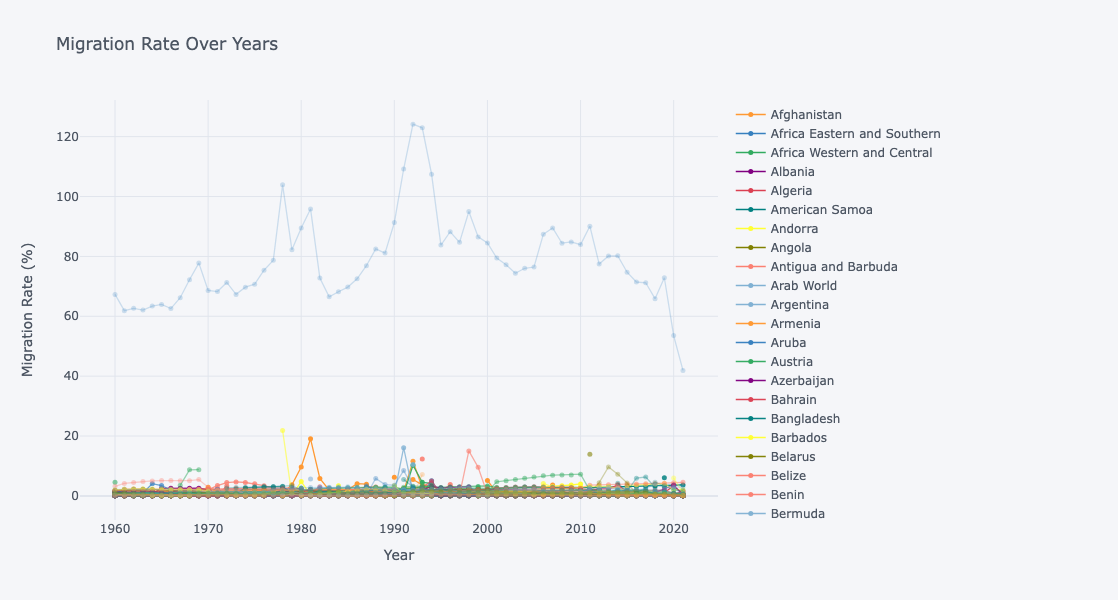

In [106]:
newnew = drop_outliers.iplot(kind='line', xTitle='Year', yTitle='Migration Rate (%)', title='Migration Rate Over Years',
         mode='lines+markers', size=5, dimensions=(1000, 600), theme='pearl')


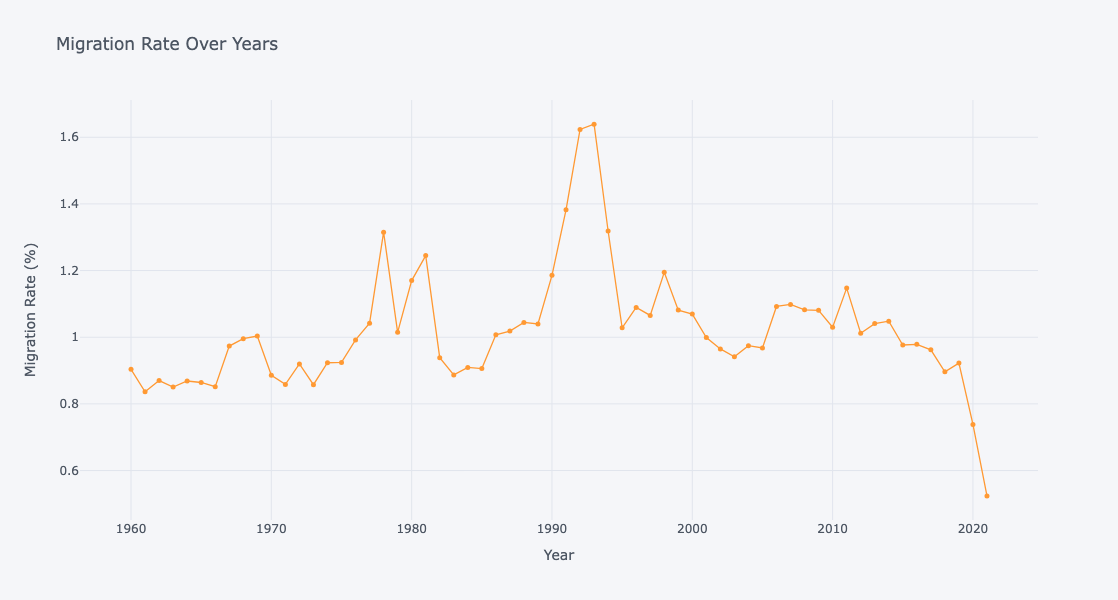

In [107]:
drop_outliers['row_avg'].iplot(kind='line', xTitle='Year', yTitle='Migration Rate (%)', title='Migration Rate Over Years',
         mode='lines+markers', size=5, dimensions=(1000, 600), theme='pearl')

In [108]:
drop_outliers.index.astype(int)

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='date')

In [109]:
# drop the last few years 
dropping = [2016, 2017, 2018, 2019, 2020, 2021]
till_2015 = drop_outliers.drop(dropping, axis=0)
till_2015

country  Afghanistan  Africa Eastern and Southern  Africa Western and Central  \
date                                                                            
1960             NaN                     0.069514                    0.000871   
1961             NaN                     0.001005                    0.041834   
1962             NaN                     0.017600                    0.035881   
1963             NaN                     0.011485                    0.036111   
1964             NaN                          NaN                    0.042973   
1965             NaN                          NaN                    0.014755   
1966             NaN                     0.007833                    0.019624   
1967             NaN                          NaN                         NaN   
1968             NaN                          NaN                    0.002036   
1969             NaN                     0.004614                    0.014066   
1970             NaN                          NaN                         NaN   
1971        0.116205                     0.053246                    0.069964   
1972        0.035883                     0.070834                    0.044303   
1973        0.026176                          NaN                    0.039739   
1974        0.168570                          NaN                    0.002685   
1975        0.365358                          NaN                    0.003578   
1976        0.687551                          NaN                    0.097247   
1977        0.655104                     0.174856                    0.052216   
1978        0.905690                          NaN                    0.054742   
1979        3.705416                          NaN                    0.049607   
1980        9.653533                     0.133716                    0.097278   
1981       19.068649                          NaN                    0.053179   
1982        5.818063                          NaN                    0.004935   
1983        1.938100                          NaN                    0.397959   
1984             NaN                          NaN                    0.201144   
1985        2.003116                          NaN                    0.157400   
1986        4.087432                          NaN                    0.115378   
1987        3.900179                          NaN                    0.097582   
1988        0.865193                     0.072227                    0.052855   
1989             NaN                     0.046162                    0.026949   
1990        6.227337                          NaN                    0.256078   
1991             NaN                     0.160468                    0.048021   
1992             NaN                     0.170268                    0.033207   
1993             NaN                     0.046777                    0.154547   
1994             NaN                     0.113799                    0.086552   
1995             NaN                     0.069015                         NaN   
1996             NaN                     0.117673                    0.077648   
1997             NaN                     0.218470                         NaN   
1998             NaN                     0.113434                    0.006783   
1999             NaN                     0.101961                    0.060492   
2000        5.153436                     0.140565                    0.008401   
2001        0.976635                     0.099448                    0.013976   
2002             NaN                     0.106992                    0.013701   
2003             NaN                     0.078965                    0.034076   
2004        1.055535                     0.074495                    0.013779   
2005             NaN                     0.078284                    0.044515   
2006             NaN                     0.060569                    0.070025   
2007        3.640026           

### Regressing Average Over Time

In [112]:
# regressing


y_values = till_2015['row_avg']  # Replace 'Country' with the actual index name
x_values = till_2015.index.get_level_values('date')  # Replace 'Year' with the actual index name
#x_values = x_values.astype(int)
# Add a constant term to the independent variable (x_values)
x_values = sm.add_constant(x_values)

# Perform linear regression
model = sm.OLS(y_values, x_values)
results = model.fit()

# Print the regression results
#print(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                row_avg   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     8.225
Date:                Tue, 23 Jan 2024   Prob (F-statistic):            0.00588
Time:                        17:24:18   Log-Likelihood:                 24.671
No. Observations:                  56   AIC:                            -45.34
Df Residuals:                      54   BIC:                            -41.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4380      2.606     -2.470      0.017     -11.663      -1.213
x1             0.0038      0.001      2.868      0.006       0.001       0.006
==============================================================================
Omnibus:                       38.775   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.434
Skew:                           2.146   Prob(JB):                     1.89e-21
Kurtosis:                       7.740   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
w_fert = mig_away[['date', 'Migration Rate (%)', 'Population Growth Rate', 'Total Fertility Rate','GDP per capita']]
w_fert_2 = w_fert.pivot_table(index='date', columns='country', values=['Migration Rate (%)', 'Total Fertility Rate', 'GDP per capita'])

w_fert_2

GDP per capita                                                         \
country    Afghanistan Africa Eastern and Southern Africa Western and Central   
date                                                                            
1960               NaN                  141.385955                 107.053706   
1961               NaN                  144.342434                 112.128417   
1962               NaN                  148.774835                 117.814663   
1963               NaN                  157.047580                 122.370114   
1964               NaN                         NaN                 130.700278   
...                ...                         ...                        ...   
2017        526.140801                 1625.286236                1590.277754   
2018        492.090632                 1558.307482                1735.374911   
2019        497.741429                 1507.982881                1812.446822   
2020               NaN                 1355.805923                1688.075575   
2021        355.777826                 1545.613215                1766.943618   

                                                                              \
country      Albania      Algeria American Samoa Andorra Antigua and Barbuda   
date                                                                           
1960             NaN   239.033006            NaN     NaN                 NaN   
1961             NaN   209.917178            NaN     NaN                 NaN   
1962             NaN   169.927013            NaN     NaN                 NaN   
1963             NaN   225.823391            NaN     NaN                 NaN   
1964             NaN   238.877805            NaN     NaN                 NaN   
...              ...          ...            ...     ...                 ...   
2017     4531.032207  4134.936087   12372.884783     NaN                 NaN   
2018     5287.660801  4171.790388   13195.935900     NaN                 NaN   
2019     5396.214243  4021.983266   13672.576657     NaN                 NaN   
2020     5343.037704  3354.153164   15609.777220     NaN                 NaN   
2021     6377.203096  3700.314697   16653.713778     NaN                 NaN   

                                ... Total Fertility Rate                     \
country   Arab World Argentina  ...              Uruguay Uzbekistan Vanuatu   
date                            ...                                           
1960             NaN       NaN  ...                  NaN        NaN     NaN   
1961             NaN       NaN  ...                  NaN        NaN     NaN   
1962             NaN       NaN  ...                2.866        NaN     NaN   
1963             NaN       NaN  ...                2.884        NaN     NaN   
1964             NaN       NaN  ...                2.863        NaN     NaN   
...              ...       ...  ...                  ...        ...     ...   
2017             NaN       NaN  ...                1.796      2.419   3.910   
2018             NaN       NaN  ...                1.658      2.604   3.855   
2019             NaN       NaN  ...                1.546      2.785   3.813   
2020     5644.142570       NaN  ...                1.477      2.904   3.778   
2021     6419.161029       NaN  ...                1.493      3.173   3.735   

                                                                         \
country Venezuela, RB Viet Nam Virgin Islands (U.S.) West Bank and Gaza   
date                                                                      
1960              NaN      NaN                   NaN                NaN   
1961              NaN      NaN                   NaN                NaN   
1962              NaN      NaN                   NaN                NaN   
1963              NaN      NaN                   NaN                NaN   
1964              NaN    6.285                   NaN                NaN   
...               ...      ...               

In [114]:
w_fert_2['mig_avg'] = w_fert_2['Migration Rate (%)'].mean(axis=1)
w_fert_2['fert_avg'] = w_fert_2['Total Fertility Rate'].mean(axis=1)
w_fert_2

GDP per capita                                                         \
country    Afghanistan Africa Eastern and Southern Africa Western and Central   
date                                                                            
1960               NaN                  141.385955                 107.053706   
1961               NaN                  144.342434                 112.128417   
1962               NaN                  148.774835                 117.814663   
1963               NaN                  157.047580                 122.370114   
1964               NaN                         NaN                 130.700278   
...                ...                         ...                        ...   
2017        526.140801                 1625.286236                1590.277754   
2018        492.090632                 1558.307482                1735.374911   
2019        497.741429                 1507.982881                1812.446822   
2020               NaN                 1355.805923                1688.075575   
2021        355.777826                 1545.613215                1766.943618   

                                                                              \
country      Albania      Algeria American Samoa Andorra Antigua and Barbuda   
date                                                                           
1960             NaN   239.033006            NaN     NaN                 NaN   
1961             NaN   209.917178            NaN     NaN                 NaN   
1962             NaN   169.927013            NaN     NaN                 NaN   
1963             NaN   225.823391            NaN     NaN                 NaN   
1964             NaN   238.877805            NaN     NaN                 NaN   
...              ...          ...            ...     ...                 ...   
2017     4531.032207  4134.936087   12372.884783     NaN                 NaN   
2018     5287.660801  4171.790388   13195.935900     NaN                 NaN   
2019     5396.214243  4021.983266   13672.576657     NaN                 NaN   
2020     5343.037704  3354.153164   15609.777220     NaN                 NaN   
2021     6377.203096  3700.314697   16653.713778     NaN                 NaN   

                                ... Total Fertility Rate                \
country   Arab World Argentina  ...              Vanuatu Venezuela, RB   
date                            ...                                      
1960             NaN       NaN  ...                  NaN           NaN   
1961             NaN       NaN  ...                  NaN           NaN   
1962             NaN       NaN  ...                  NaN           NaN   
1963             NaN       NaN  ...                  NaN           NaN   
1964             NaN       NaN  ...                  NaN           NaN   
...              ...       ...  ...                  ...           ...   
2017             NaN       NaN  ...                3.910         2.294   
2018             NaN       NaN  ...                3.855         2.272   
2019             NaN       NaN  ...                3.813         2.250   
2020     5644.142570       NaN  ...                3.778         2.230   
2021     6419.161029       NaN  ...                3.735         2.211   

                                                                              \
country Viet Nam Virgin Islands (U.S.) West Bank and Gaza Yemen, Rep. Zambia   
date                                                                           
1960         NaN                   NaN                NaN       7.938  7.115   
1961         NaN                   NaN                NaN       7.963  7.169   
1962         NaN                   NaN                NaN       7.963  7.214   
1963         NaN                   NaN                NaN       7.981  7.249   
1964       6.285                   NaN                NaN       8.038  7.274   
...          ...                   ...                ...         ...    ..

In [115]:
dropping = [2016, 2017, 2018, 2019, 2020, 2021]
w_fert22 = w_fert_2.drop(dropping, axis=0)

w_fert22.columns

MultiIndex([(      'GDP per capita',                 'Afghanistan'),
            (      'GDP per capita', 'Africa Eastern and Southern'),
            (      'GDP per capita',  'Africa Western and Central'),
            (      'GDP per capita',                     'Albania'),
            (      'GDP per capita',                     'Algeria'),
            (      'GDP per capita',              'American Samoa'),
            (      'GDP per capita',                     'Andorra'),
            (      'GDP per capita',         'Antigua and Barbuda'),
            (      'GDP per capita',                  'Arab World'),
            (      'GDP per capita',                   'Argentina'),
            ...
            ('Total Fertility Rate',                     'Vanuatu'),
            ('Total Fertility Rate',               'Venezuela, RB'),
            ('Total Fertility Rate',                    'Viet Nam'),
            ('Total Fertility Rate',       'Virgin Islands (U.S.)'),
            ('Tota

In [116]:
columns_to_drop = ['Kuwait', 'Liberia', 'Rwanda']
df_cleaned = w_fert22.drop(columns=columns_to_drop, level = 'country')
# Drop the specified columns
df_cleaned

GDP per capita                                                         \
country    Afghanistan Africa Eastern and Southern Africa Western and Central   
date                                                                            
1960               NaN                  141.385955                 107.053706   
1961               NaN                  144.342434                 112.128417   
1962               NaN                  148.774835                 117.814663   
1963               NaN                  157.047580                 122.370114   
1964               NaN                         NaN                 130.700278   
1965               NaN                         NaN                 137.301801   
1966               NaN                  186.630486                 143.012562   
1967               NaN                         NaN                        NaN   
1968               NaN                         NaN                 128.366811   
1969               NaN                  229.711026                 142.327523   
1970               NaN                         NaN                        NaN   
1971        166.224831                  258.700523                 167.637045   
1972        141.365322                  270.761172                 198.403376   
1973        149.744068                         NaN                 243.875530   
1974        181.598776                         NaN                 330.078714   
1975        194.669036                         NaN                 374.015474   
1976        205.674097                         NaN                 439.832147   
1977        232.778699                  447.927785                 450.074086   
1978        255.045622                         NaN                 477.194017   
1979        284.755532                         NaN                 577.541556   
1980        291.649791                  720.771507                 709.848877   
1981        311.853617                         NaN                1299.911318   
1982               NaN                         NaN                1120.594020   
1983               NaN                         NaN                 805.033534   
1984               NaN                         NaN                 649.025771   
1985               NaN                         NaN                 644.343875   
1986               NaN                         NaN                 578.865282   
1987               NaN                         NaN                 578.117585   
1988               NaN                  702.320061                 555.926365   
1989               NaN                  725.869675                 505.333080   
1990               NaN                         NaN                 589.165831   
1991               NaN                  865.255505                 602.994289   
1992               NaN                  734.738293                 562.362464   
1993               NaN                  710.176421                 571.882781   
1994               NaN                  700.189236                 579.701872   
1995               NaN                  766.165631                        NaN   
1996               NaN                  741.056263                1078.702831   
1997               NaN                  762.894348                        NaN   
1998               NaN                  700.224696                1154.479523   
1999               NaN                  673.520993                 523.224236   
2000               NaN                  710.665706                 519.757395   
2001               NaN                  631.595695                 532.272576   
2002               NaN                  631.928282                 619.712652   
2003               NaN                  818.121921                 697.851236   
2004        221.830531                  991.192169                 841.297352   
2005               NaN                 1126.375948                1000.793722   
2006               NaN                 

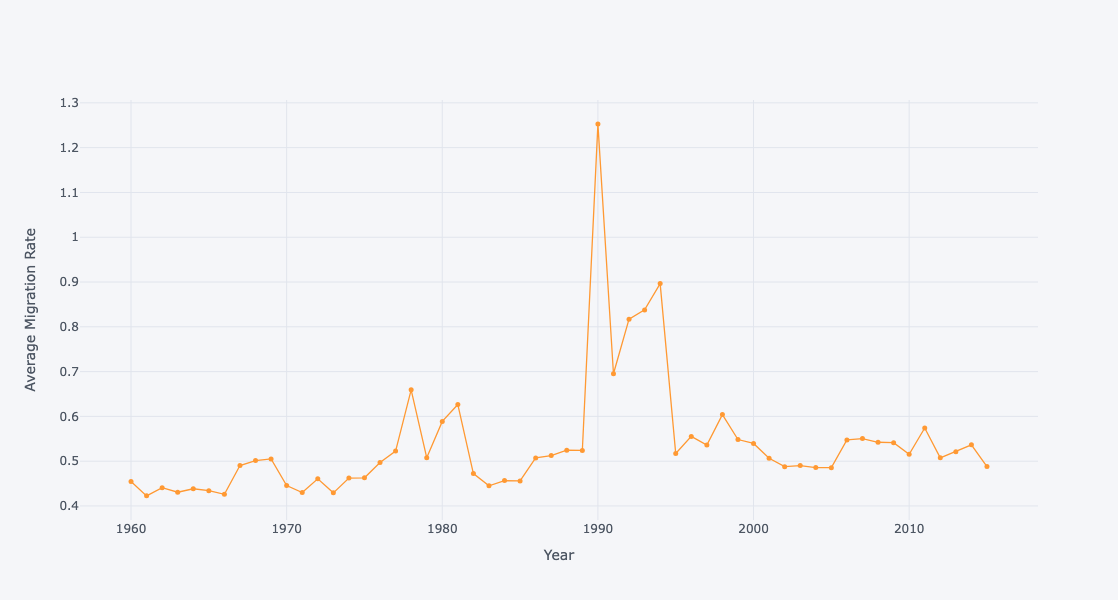

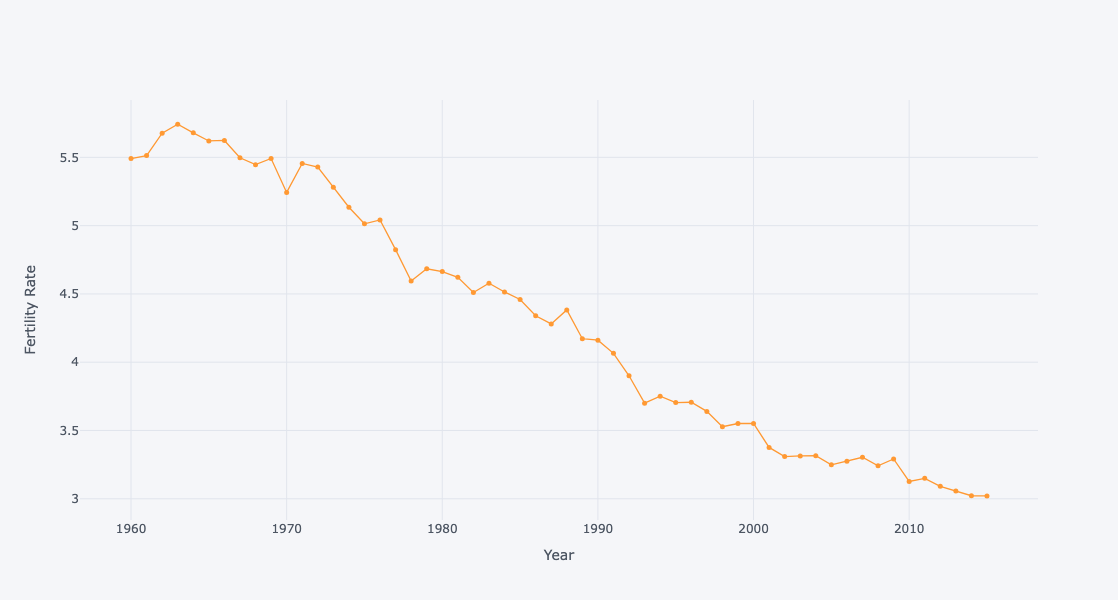

In [117]:
### Regressing average against population growth rate  
w_fert22['mig_avg'].iplot(kind='line', xTitle = 'Year', yTitle = 'Average Migration Rate', size = 5,
                         mode='lines+markers', dimensions=(1000, 600), theme='pearl')

#y = -9.6570 + x_values*0.0056
#fit = pd.DataFrame(
w_fert22['fert_avg'].iplot(kind='line', xTitle = 'Year', yTitle = 'Fertility Rate', size = 5, 
                          mode='lines+markers', dimensions=(1000, 600), theme='pearl')

In [120]:
df_cleaned['mig_avg'] = df_cleaned['Migration Rate (%)'].mean(axis=1)
df_cleaned['fert_avg'] = df_cleaned['Total Fertility Rate'].mean(axis=1)
df_cleaned['GDPcap_avg'] = df_cleaned['GDP per capita'].mean(axis=1)
df_cleaned

GDP per capita                                                         \
country    Afghanistan Africa Eastern and Southern Africa Western and Central   
date                                                                            
1960               NaN                  141.385955                 107.053706   
1961               NaN                  144.342434                 112.128417   
1962               NaN                  148.774835                 117.814663   
1963               NaN                  157.047580                 122.370114   
1964               NaN                         NaN                 130.700278   
1965               NaN                         NaN                 137.301801   
1966               NaN                  186.630486                 143.012562   
1967               NaN                         NaN                        NaN   
1968               NaN                         NaN                 128.366811   
1969               NaN                  229.711026                 142.327523   
1970               NaN                         NaN                        NaN   
1971        166.224831                  258.700523                 167.637045   
1972        141.365322                  270.761172                 198.403376   
1973        149.744068                         NaN                 243.875530   
1974        181.598776                         NaN                 330.078714   
1975        194.669036                         NaN                 374.015474   
1976        205.674097                         NaN                 439.832147   
1977        232.778699                  447.927785                 450.074086   
1978        255.045622                         NaN                 477.194017   
1979        284.755532                         NaN                 577.541556   
1980        291.649791                  720.771507                 709.848877   
1981        311.853617                         NaN                1299.911318   
1982               NaN                         NaN                1120.594020   
1983               NaN                         NaN                 805.033534   
1984               NaN                         NaN                 649.025771   
1985               NaN                         NaN                 644.343875   
1986               NaN                         NaN                 578.865282   
1987               NaN                         NaN                 578.117585   
1988               NaN                  702.320061                 555.926365   
1989               NaN                  725.869675                 505.333080   
1990               NaN                         NaN                 589.165831   
1991               NaN                  865.255505                 602.994289   
1992               NaN                  734.738293                 562.362464   
1993               NaN                  710.176421                 571.882781   
1994               NaN                  700.189236                 579.701872   
1995               NaN                  766.165631                        NaN   
1996               NaN                  741.056263                1078.702831   
1997               NaN                  762.894348                        NaN   
1998               NaN                  700.224696                1154.479523   
1999               NaN                  673.520993                 523.224236   
2000               NaN                  710.665706                 519.757395   
2001               NaN                  631.595695                 532.272576   
2002               NaN                  631.928282                 619.712652   
2003               NaN                  818.121921                 697.851236   
2004        221.830531                  991.192169                 841.297352   
2005               NaN                 1126.375948                1000.793722   
2006               NaN                 

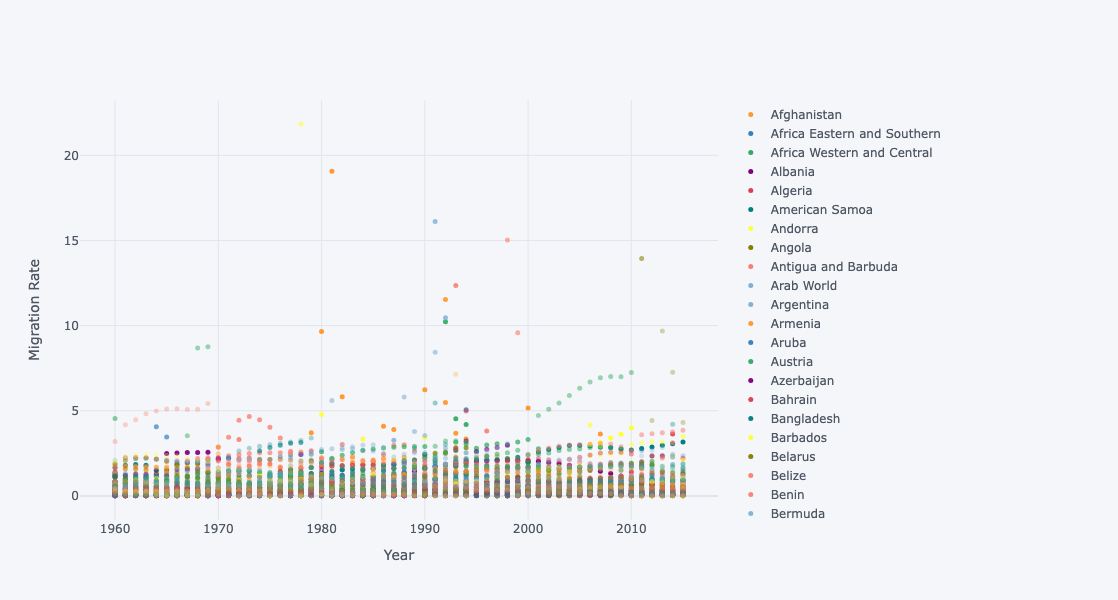

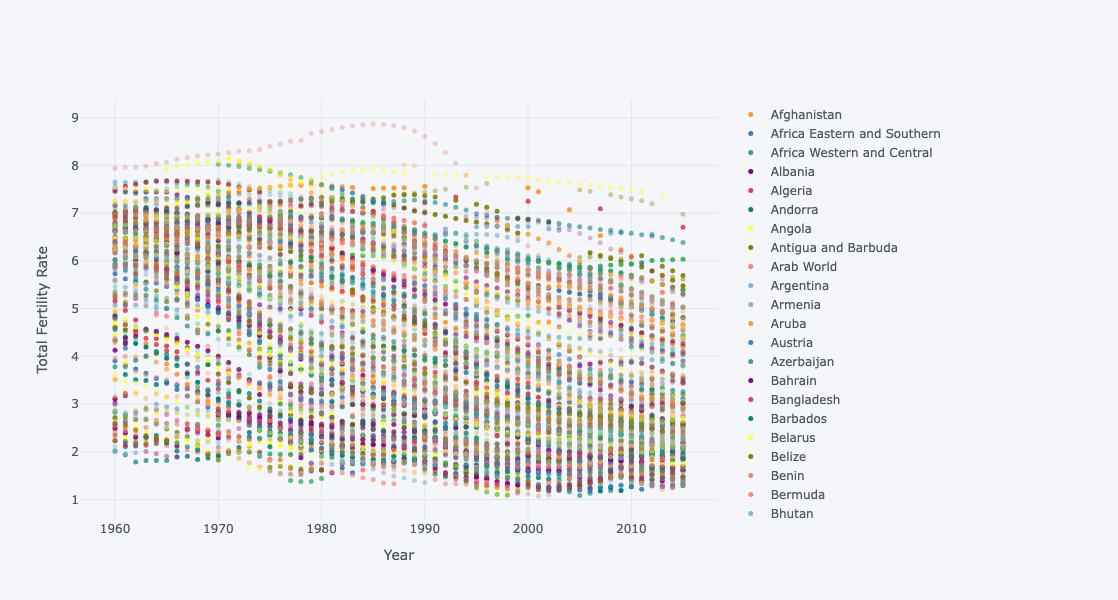

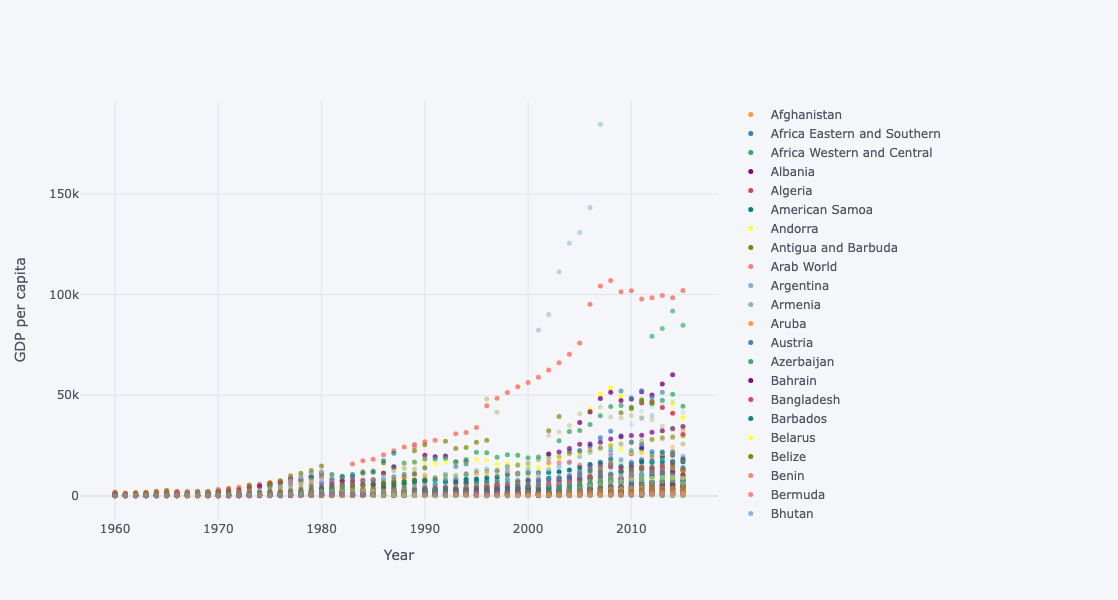

In [121]:
### Regressing average against population growth rate  
df_cleaned['Migration Rate (%)'].iplot(kind='scatter', xTitle = 'Year', yTitle = 'Migration Rate', size = 5,
                         mode='markers', dimensions=(1000, 600), theme='pearl')

#y = -9.6570 + x_values*0.0056
#fit = pd.DataFrame(
df_cleaned['Total Fertility Rate'].iplot(kind='scatter', xTitle = 'Year', yTitle = 'Total Fertility Rate', size = 5, 
                          mode='markers', dimensions=(1000, 600), theme='pearl')

df_cleaned['GDP per capita'].iplot(kind='scatter', xTitle = 'Year', yTitle = 'GDP per capita', size = 5, 
                          mode='markers', dimensions=(1000, 600), theme='pearl')

In [122]:
# regressing
y_values = df_cleaned['mig_avg']  # Replace 'Country' with the actual index name
x_values = df_cleaned['GDPcap_avg'] # Replace 'Year' with the actual index name
#x_values = x_values.astype(int)
# Add a constant term to the independent variable (x_values)
x_values = sm.add_constant(x_values)

# Perform linear regression
model = sm.OLS(y_values, x_values)
results = model.fit()

# Print the regression results
#print(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mig_avg   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.225
Date:                Tue, 23 Jan 2024   Prob (F-statistic):              0.142
Time:                        17:25:43   Log-Likelihood:                 60.303
No. Observations:                  56   AIC:                            -116.6
Df Residuals:                      54   BIC:                            -112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5029      0.017     29.854      0.000       0.469       0.537
GDPcap_avg  6.505e-06   4.36e-06      1.492      0.142   -2.24e-06    1.52e-05
==============================================================================
Omnibus:                       36.980   Durbin-Watson:                   0.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.748
Skew:                           2.059   Prob(JB):                     1.46e-19
Kurtosis:                       7.496   Cond. No.                     5.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

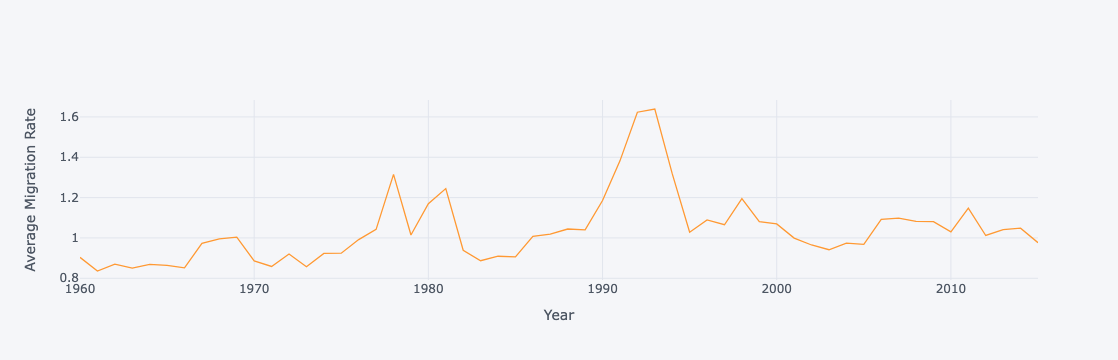

In [123]:
till_2015['row_avg'].iplot(kind='line', xTitle = 'Year', yTitle = 'Average Migration Rate')



In [124]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index or ar

In [125]:

y = -9.6570 + till_2015.index.get_level_values('date')*0.0056

#data = {'country': ['A', 'A', 'B', 'B'],
       # 'date': [2020, 2021, 2020, 2021],
       # 'migration_rate': [0.025, 0.030, 0.020, 0.018]}

#fit = pd.DataFrame({y
till_2015['reg line'] = y
till_2015

country  Afghanistan  Africa Eastern and Southern  Africa Western and Central  \
date                                                                            
1960             NaN                     0.069514                    0.000871   
1961             NaN                     0.001005                    0.041834   
1962             NaN                     0.017600                    0.035881   
1963             NaN                     0.011485                    0.036111   
1964             NaN                          NaN                    0.042973   
1965             NaN                          NaN                    0.014755   
1966             NaN                     0.007833                    0.019624   
1967             NaN                          NaN                         NaN   
1968             NaN                          NaN                    0.002036   
1969             NaN                     0.004614                    0.014066   
1970             NaN                          NaN                         NaN   
1971        0.116205                     0.053246                    0.069964   
1972        0.035883                     0.070834                    0.044303   
1973        0.026176                          NaN                    0.039739   
1974        0.168570                          NaN                    0.002685   
1975        0.365358                          NaN                    0.003578   
1976        0.687551                          NaN                    0.097247   
1977        0.655104                     0.174856                    0.052216   
1978        0.905690                          NaN                    0.054742   
1979        3.705416                          NaN                    0.049607   
1980        9.653533                     0.133716                    0.097278   
1981       19.068649                          NaN                    0.053179   
1982        5.818063                          NaN                    0.004935   
1983        1.938100                          NaN                    0.397959   
1984             NaN                          NaN                    0.201144   
1985        2.003116                          NaN                    0.157400   
1986        4.087432                          NaN                    0.115378   
1987        3.900179                          NaN                    0.097582   
1988        0.865193                     0.072227                    0.052855   
1989             NaN                     0.046162                    0.026949   
1990        6.227337                          NaN                    0.256078   
1991             NaN                     0.160468                    0.048021   
1992             NaN                     0.170268                    0.033207   
1993             NaN                     0.046777                    0.154547   
1994             NaN                     0.113799                    0.086552   
1995             NaN                     0.069015                         NaN   
1996             NaN                     0.117673                    0.077648   
1997             NaN                     0.218470                         NaN   
1998             NaN                     0.113434                    0.006783   
1999             NaN                     0.101961                    0.060492   
2000        5.153436                     0.140565                    0.008401   
2001        0.976635                     0.099448                    0.013976   
2002             NaN                     0.106992                    0.013701   
2003             NaN                     0.078965                    0.034076   
2004        1.055535                     0.074495                    0.013779   
2005             NaN                     0.078284                    0.044515   
2006             NaN                     0.060569                    0.070025   
2007        3.640026           

In [126]:
to_plot = till_2015[['row_avg', 'reg line']]

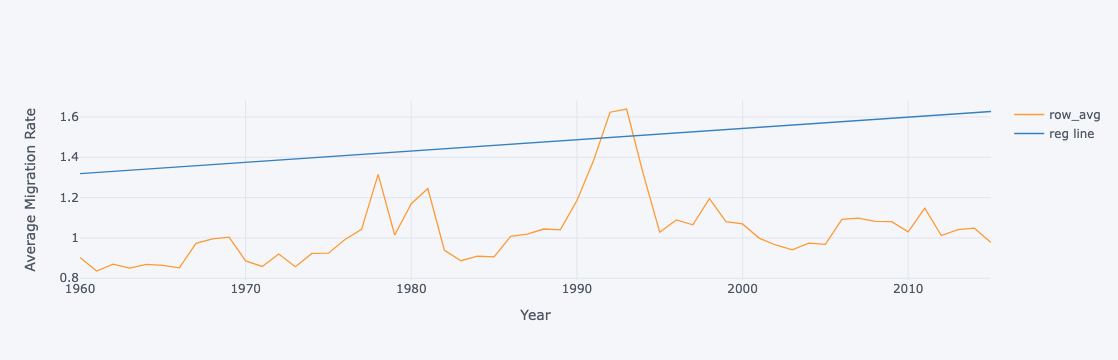

In [127]:
to_plot.iplot(kind='line', xTitle = 'Year', yTitle = 'Average Migration Rate')

In [128]:
till_2015[1985:1995]

Empty WBDataFrame
Columns: [Afghanistan, Africa Eastern and Southern, Africa Western and Central, Albania, Algeria, American Samoa, Andorra, Angola, Antigua and Barbuda, Arab World, Argentina, Armenia, Aruba, Austria, Azerbaijan, Bahrain, Bangladesh, Barbados, Belarus, Belize, Benin, Bermuda, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Caribbean small states, Cayman Islands, Central African Republic, Central Europe and the Baltics, Chad, Channel Islands, Chile, China, Colombia, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, Early-demographic dividend, East Asia & Pacific, East Asia & Pacific (IDA & IBRD countries), East Asia & Pacific (excluding high income), Ecuador, Egypt, Arab Rep., El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Euro area, Europe & Central Asia, Europe & Central Asia (IDA & IBRD countries), Europe & Central Asia (excluding high income), European Union, Faroe Islands, Fiji, Finland, Fragile and conflict affected situations, French Polynesia, Gambia, The, Georgia, Germany, Ghana, Gibraltar, Greece, Greenland, Grenada, Guam, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Heavily indebted poor countries (HIPC), Honduras, Hong Kong SAR, China, Hungary, IBRD only, IDA & IBRD total, IDA blend, ...]
Index: []

[0 rows x 248 columns]

In [129]:
mig_90s = till_2015.loc[(till_2015.index >= 1980) & (till_2015.index <= 2000)]
mig_90s

country  Afghanistan  Africa Eastern and Southern  Africa Western and Central  \
date                                                                            
1980        9.653533                     0.133716                    0.097278   
1981       19.068649                          NaN                    0.053179   
1982        5.818063                          NaN                    0.004935   
1983        1.938100                          NaN                    0.397959   
1984             NaN                          NaN                    0.201144   
1985        2.003116                          NaN                    0.157400   
1986        4.087432                          NaN                    0.115378   
1987        3.900179                          NaN                    0.097582   
1988        0.865193                     0.072227                    0.052855   
1989             NaN                     0.046162                    0.026949   
1990        6.227337                          NaN                    0.256078   
1991             NaN                     0.160468                    0.048021   
1992             NaN                     0.170268                    0.033207   
1993             NaN                     0.046777                    0.154547   
1994             NaN                     0.113799                    0.086552   
1995             NaN                     0.069015                         NaN   
1996             NaN                     0.117673                    0.077648   
1997             NaN                     0.218470                         NaN   
1998             NaN                     0.113434                    0.006783   
1999             NaN                     0.101961                    0.060492   
2000        5.153436                     0.140565                    0.008401   

country   Albania   Algeria  American Samoa  Andorra  Angola  \
date                                                           
1980     0.341879       NaN             NaN      NaN     NaN   
1981     0.456043       NaN             NaN      NaN     NaN   
1982     0.564096       NaN             NaN      NaN     NaN   
1983     0.676205       NaN             NaN      NaN     NaN   
1984     0.800605       NaN             NaN      NaN     NaN   
1985     0.926482       NaN             NaN      NaN     NaN   
1986     1.063410       NaN             NaN      NaN     NaN   
1987     1.206023  0.078707             NaN      NaN     NaN   
1988     1.349092  0.077618             NaN      NaN     NaN   
1989     1.488688  0.079953             NaN      NaN     NaN   
1990     1.604209  0.084807        0.524907      NaN     NaN   
1991     1.732557  0.090155        1.030781      NaN     NaN   
1992     1.836566  0.094159        1.030393      NaN     NaN   
1993     1.918794  0.095787        1.020049      NaN     NaN   
1994     1.985948  0.114243        0.910343      NaN     NaN   
1995     2.042359  0.100362        0.784630      NaN     NaN   
1996     2.076999  0.033980        0.706422      NaN     NaN   
1997     2.095588       NaN        0.728706      NaN     NaN   
1998     2.097343  0.091520        0.796778      NaN     NaN   
1999     2.084002  0.039821        0.784804      NaN     NaN   
2000     2.059224  0.061720        1.988666      NaN     NaN   

country  Antigua and Barbuda  Arab World  ...  Venezuela, RB  Viet Nam  \
date                                      ...                            
1980                1.276025         NaN  ...            NaN  0.099112   
1981                1.246235    0.010527  ...            NaN  0.106328   
1982                1.215680         NaN  ...            NaN  0.105691   
1983                1.160409         NaN  ...            NaN  0.100455   
1984                1.848169         NaN  ...            NaN  0.093701   
1985                2.001599    0.037381  ...            NaN  0.093807   
1986                1.891458         NaN  ...            NaN  0.096174 

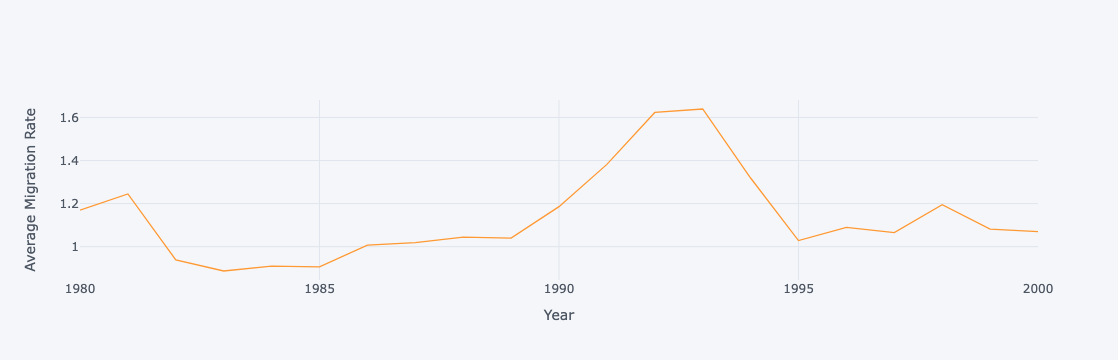

In [130]:
mig_90s['row_avg'].iplot(kind='line', xTitle = 'Year', yTitle = 'Average Migration Rate')

In [131]:
# regressing 
y_values = mig_90s['row_avg']  # Replace 'Country' with the actual index name
x_values = mig_90s.index.get_level_values('date')  # Replace 'Year' with the actual index name
#x_values = x_values.astype(int)
# Add a constant term to the independent variable (x_values)
x_values = sm.add_constant(x_values)

# Perform linear regression
model = sm.OLS(y_values, x_values)
results = model.fit()

# Print the regression results
#print(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                row_avg   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.531
Date:                Tue, 23 Jan 2024   Prob (F-statistic):              0.231
Time:                        17:26:32   Log-Likelihood:                 4.2827
No. Observations:                  21   AIC:                            -4.565
Df Residuals:                      19   BIC:                            -2.476
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2751     14.878     -1.161      0.260     -48.414      13.864
x1             0.0093      0.007      1.237      0.231      -0.006       0.025
==============================================================================
Omnibus:                        7.629   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.693
Skew:                           1.252   Prob(JB):                       0.0580
Kurtosis:                       3.482   Cond. No.                     6.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""